<a href="https://colab.research.google.com/github/chaeyunyeo/2022-2-Euron-Study-Assignment/blob/week3/DS_Week3_%EB%B3%B5%EC%8A%B5%EA%B3%BC%EC%A0%9C_%EC%97%AC%EC%B1%84%EC%9C%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Week2 복습과제
### 1. Wine 성분 데이터를 바탕으로 와인 품질 분류
### 결정트리, 랜덤포레스트 실습
#### 데이터셋을 다운 받아주세요!


In [2]:
#구글 드라이브와 연동
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1 'train.csv'를 불러와 train_df에, 'test.csv'를 불러와 test_df에 저장하시오

In [3]:
train_df = pd.read_csv("/content/gdrive/MyDrive/euron study/복습과제/train.csv")
test_df = pd.read_csv("/content/gdrive/MyDrive/euron study/복습과제/test.csv")

#### 1.2 train 데이터의 3 행을 통해 데이터를 파악하시오

In [5]:
train_df.head(3)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


#### 1.3 index 열이 불필요해보입니다. drop을 통해 train과 test 데이터의 index행을 삭제하세요 그리고 확인해주세요

In [6]:
train_df = train_df.drop(['index'],axis=1)
test_df = test_df.drop(['index'],axis=1)
train_df.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [7]:
test_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


#### 1.4 train 데이터의 결측치의 유무 여부 또는 평균, min, max, q1, q2, q3, q4 등을 describe 또는 info를 활용해 확인하시오

In [9]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


#### 1.5 'quality'열에 어떤 값이 들어있는 지 알아보시오 (예측하고자 하는 y값이 될 열 입니다.) value_counts 사용

In [11]:
train_df.value_counts(['quality'])

quality
6          2416
5          1788
7           924
4           186
8           152
3            26
9             5
dtype: int64

#### 1.6 train 데이터와 test 데이터의 'type'이 object로 되어있으니 인코딩을 해주세요 (레이블인코딩, encoder.fit_transform 사용)
#### 잘 인코딩이 되었는지 확인해주세요(value_counts() 사용)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder= LabelEncoder()

train_df['type'] = encoder.fit_transform(train_df['type'])
test_df['type'] = encoder.fit_transform(test_df['type'])

display(train_df.value_counts(['type']))
test_df.value_counts(['type'])

type
1       4159
0       1338
dtype: int64

type
1       739
0       261
dtype: int64

#### 1.7 독립변수(X)와 종속변수(y)로 분리해주세요(iloc 또는 loc 활용) 그리고 확인해주세요
#### X와 y를 X_train, X_test, y_train, y_test으로 나누시오. (test_size=0.2, random_state=12) 

In [16]:
from sklearn.model_selection import train_test_split

In [22]:
y = train_df.iloc[:,0]
X = train_df.iloc[:,1:]
y

0       5
1       5
2       5
3       6
4       6
       ..
5492    5
5493    6
5494    7
5495    5
5496    6
Name: quality, Length: 5497, dtype: int64

In [23]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,1
5493,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,1
5494,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,1
5495,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,1


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

#### 1.8 DecisionTreeClassifier를 사용해 훈련데이터를 fit 한 후, 테스트 셋으로 예측의 정확도를 구하시오. 
#### DecisionTreeClassifer 의 random_state = 12

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [26]:
df_clf = DecisionTreeClassifier(random_state=12)
df_clf.fit(X_train,y_train)
pred = df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
accuracy

0.6081818181818182

#### 1.9 GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으시오

params = {
    'max_depth' : [11, 14, 17, 20, 23, 26, 29],
    'min_samples_split' : [2]
}

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
params = {
     'max_depth' : [11, 14, 17, 20, 23, 26, 29], 'min_samples_split' : [2]
}
grid_cv = GridSearchCV(df_clf,param_grid=params, scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
grid_cv.best_params_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


{'max_depth': 17, 'min_samples_split': 2}

#### 1.10 테스트 데이터 세트에 대해 예측을 수행해주세요

In [29]:
df_clf = DecisionTreeClassifier(random_state=12,max_depth=17,min_samples_split=2)
df_clf.fit(X_train,y_train)
pred = df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
accuracy

0.5972727272727273

### 2. 앙상블, 랜덤 포레스트

#### 2.1 개별 모델로 로지스틱 회귀와 KNN을 사용하여 개별 모델의 학습 / 예측/ 평가를 진행해보세요. (solver="liblinear", n_neighbors = 16)

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
lr_clf = LogisticRegression(solver="liblinear")
knn_clf = KNeighborsClassifier(n_neighbors=16)
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

LogisticRegression 정확도: 0.5482
KNeighborsClassifier 정확도: 0.4573


#### 2.2 로지스틱 회귀와 KNN을 기반으로 하여 보팅 분류기를 만들어 본 후, 학습/예측/평가를 진행해보세요. (VotingClassifier 사용, voting='soft')

In [33]:
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.5182


#### 2.3 randomforestclassifier를 이용하여 훈련 데이터를 fit한 후, 테스트셋의 정확도를 구하세요(random_state=12, max_depth=8)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [35]:
rf_clf = RandomForestClassifier(random_state=12, max_depth=8)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.6109


#### 2.4 GridSearchCV를 사용해 최적의 하이퍼 파라미터 조합을 찾으세요.(random_state=12, n_jobs= -1, cv=2)

params = {
    'n_estimators':[10, 50, 100],
    'max_depth' : [2, 8, 14, 20, 26, 32], 
    'min_samples_leaf' : [8, 12, 16, 20], 
    'min_samples_split' : [8, 16, 24, 32]
}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 8, 14, 20, 26, 32],
    'min_samples_leaf' :[8, 12, 16, 20],
    'min_samples_split' : [8, 16, 24, 32],
    'n_estimators':[10, 50, 100]
}
rf_clf = RandomForestClassifier(random_state=12, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 14, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 50}
최고 예측 정확도: 0.5790


#### 2.5 2.4번에서 구한 최적의 하이퍼 파라미터로 다시 RandomForestClassifier를 학습 시킨 뒤에, 예측 성능을 측정해보세요.

In [38]:
rf_clf = RandomForestClassifier(max_depth=14, min_samples_leaf=8, min_samples_split=8, n_estimators=50)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.6127


#### 2.6 피처 주요도를 막대그래프로 시각화해보세요.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

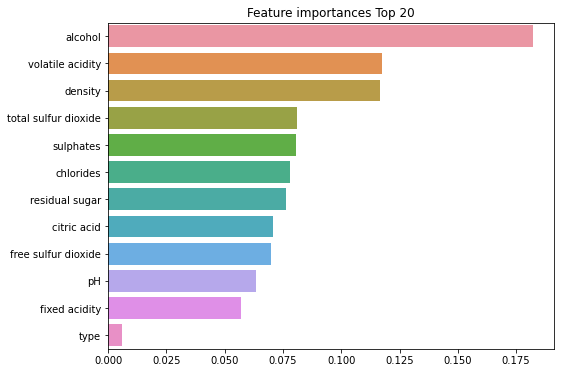

In [40]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

### 3. SVM 사용

#### 3.1 split된 와인 분류 데이터를 가지고 선형 SVM 모델을 만들어 fit 하세요. 정확도도 함께 출력하세요. (C = 5)

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [52]:
lin_svm = SVC(kernel='linear',C=5)
lin_svm.fit(X_train,y_train)
pred = lin_svm.predict(X_test)
accuracy = accuracy_score(y_test , pred)
accuracy

0.5481818181818182

#### 3.2 와인 품질 분류 선형 SVM 모델에서 GridSearchCV를 이용하여 최적의 C값과 최고 score를 출력하세요.

In [50]:
from sklearn.model_selection import GridSearchCV
param = {'C':[0.1,0.5,1,5,10,40]}

In [53]:
GS = GridSearchCV(SVC(kernel='rbf'),param,cv=5)
GS.fit(X_train,y_train)
print(GS.best_params_)
print(GS.best_score_)

{'C': 40}
0.5110262178094942


#### 3.3 위에서 구한 최적 파라미터로 다시 예측을 진행하세요. 정확도도 함께 출력하세요.(best_estimator_ 이용)

In [54]:
estimator=GS.best_estimator_
pred = estimator.predict(X_test)
accuracy_score(y_test,pred)

0.5181818181818182

#### 3.4 GridSearchCV를 이용하여 최적의 gamma, C 값을 찾고 가우시안 SVM 모델을 만들어 fit 하세요.

In [55]:
params={'C':[0.1,0.5,1,5,10,40,100],
        'gamma':[0.1,0.25,0.5,0.75,1,10]}

In [57]:
GS = GridSearchCV(SVC(kernel='rbf'),param,cv=5)
GS.fit(X_train,y_train)
print(GS.best_params_)
print(GS.best_score_)

{'C': 40}
0.5110262178094942
